<a href="https://colab.research.google.com/github/dennkitotaichi/kabuka1/blob/master/light_GBM_kabu_localhost%EF%BC%9A27017%EF%BC%9A%5BErrno_111%5D%E6%8E%A5%E7%B6%9A%E3%81%8C%E6%8B%92%E5%90%A6%E3%81%95%E3%82%8C%E3%81%BE%E3%81%97%E3%81%9F%E8%8B%A6%E6%88%A6%E4%B8%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#save, read, deleteを用意したMongoDBのラッパーファイル（db.py）を作成する。 DB名とCollection名を初期化で指定する。 saveはdictのlistをdataとして渡す。

import sys
import pymongo
import importlib

#class DB:

class DB:
    def __init__(self, db_name, coll_name):
        self.db_name = db_name
        self.coll_name = coll_name


    def save(self, data):
        client = pymongo.MongoClient('localhost', 27017)
        db = client[self.db_name]
        coll = db[self.coll_name]

        coll.insert(data)


    def read(self):
        client = pymongo.MongoClient('localhost', 27017)
        db = client[self.db_name]
        coll = db[self.coll_name]

        data = [d for d in coll.find()]

        return data


    def delete(self):
        client = pymongo.MongoClient('localhost', 27017)
        db = client[self.db_name]
        coll = db[self.coll_name]

        coll.drop()

In [5]:
import sys
print ("sys.path")
print (sys.path)
print ("!jsm install")
!jsm install


print ("!pip install -jsm-")
!pip install -jsm-
print ("!pip show -jsm-")
!pip show -jsm-
print ("sys.path")


sys.path
['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']
!jsm install
/bin/bash: jsm: command not found
!pip install -jsm-

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -j
!pip show -jsm-

Usage:   
  pip3 show [options] <package> ...

no such option: -j
sys.path


In [14]:
import sys
#jsmがインポートしたはずなのにインポートできない
#!つけるとLinuxのコマンドになるらしい
!pip install -jsm-
!pip show -jsm-
!import jsm
from progressbar import ProgressBar
import pandas as pd
import datetime

!from db import DB

!reload(sys)
!sys.setdefaultencoding('utf-8')

DB_STOCK = 'stock'  # Stock DB
COLL_BRAND = 'brand'  # Brand Collection
COLL_FINANCE = 'finance'  # Finace Collection
COLL_PRICE = 'price'  # Price Collection
START_DATE = datetime.date(2014, 1, 1)  # 株価の取得開始日


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -j

Usage:   
  pip3 show [options] <package> ...

no such option: -j
/bin/bash: import: command not found
from: can't read /var/mail/db
/bin/bash: -c: line 0: syntax error near unexpected token `sys'
/bin/bash: -c: line 0: `reload(sys)'
/bin/bash: -c: line 0: syntax error near unexpected token `'utf-8''
/bin/bash: -c: line 0: `sys.setdefaultencoding('utf-8')'


In [0]:
def get_brands(self):
    db = DB(DB_STOCK, COLL_BRAND)
    #db.delete()

    categories = [
        '0050',  # 農林・水産業
        '1050',  # 鉱業
        '2050',  # 建設業
        '3050',  # 食料品
        '3100',  # 繊維製品
        '3150',  # パルプ・紙
        '3200',  # 化学
        '3250',  # 医薬品
        '3300',  # 石油・石炭製品
        '3350',  # ゴム製品
        '3400',  # ガラス・土石製品
        '3450',  # 鉄鋼
        '3500',  # 非鉄金属
        '3550',  # 金属製品
        '3600',  # 機械
        '3650',  # 電気機器
        '3700',  # 輸送機器
        '3750',  # 精密機器
        '3800',  # その他製品
        '4050',  # 電気・ガス業
        '5050',  # 陸運業
        '5100',  # 海運業
        '5150',  # 空運業
        '5200',  # 倉庫・運輸関連業
        '5250',  # 情報・通信
        '6050',  # 卸売業
        '6100',  # 小売業
        '7050',  # 銀行業
        '7100',  # 証券業
        '7150',  # 保険業
        '7200',  # その他金融業
        '8050',  # 不動産業
        '9050'   # サービス業
    ]

    q = jsm.Quotes()
    pb = ProgressBar(maxval=len(categories)).start()
    for i in range(len(categories)):
        lis = []
        try:
            brands = q.get_brand(categories[i])
        except:
            pass
        for b in brands:
            dic = {
                    'category': categories[i],
                    'ccode': b.ccode,
                    'market': b.market,
                    'name': b.name,
                    'info': b.info
            }
            lis.append(dic)
        db.save(lis)
        pb.update(i+1)

In [0]:
def get_target_ccodes(self):
    data = DB(DB_STOCK, COLL_BRAND).read()
    df_brand = pd.DataFrame(data)
    df_brand = df_brand[df_brand['market']=='東証1部']
    ccodes = df_brand['ccode'].tolist()

    return ccodes

In [0]:
def get_finances(self, ccodes):
    db = DB(DB_STOCK, COLL_FINANCE)
    #db.delete()

    q = jsm.Quotes()
    pb = ProgressBar(maxval=len(ccodes)).start()
    lis = []
    for i in range(len(ccodes)):
        try:
            f = q.get_finance(ccodes[i])
        except:
            pass
        dic = {
                'ccode': ccodes[i],
                'market_cap': f.market_cap,
                'shares_issued': f.shares_issued,
                'dividend_yield': f.dividend_yield,
                'dividend_one': f.dividend_one,
                'per': f.per,
                'pbr': f.pbr,
                'eps': f.eps,
                'bps': f.bps,
                'price_min': f.price_min,
                'round_lot': f.round_lot,
                'years_high': f.years_high,
                'years_low': f.years_low
        }
        lis.append(dic)
        pb.update(i+1)

    db.save(lis)

In [0]:
def get_prices(self, ccodes):
    start_date = START_DATE
    end_date = datetime.date.today()

    db = DB(DB_STOCK, COLL_PRICE)
    #db.delete()

    q = jsm.Quotes()
    pb = ProgressBar(maxval=len(ccodes)).start()
    for i in range(len(ccodes)):
        lis = []
        try:
            prices = q.get_historical_prices(ccodes[i], jsm.DAILY, start_date, end_date)
        except:
            pass
        for p in prices:
            dic = {
                    'ccode': ccodes[i],
                    'date': p.date,
                    'open': p.open,
                    'high': p.high,
                    'low': p.low,
                    'close': p.close,
                    'volume': p.volume
            }
            lis.append(dic)
        db.save(lis)
        pb.update(i+1)

In [28]:
# -*- coding: utf-8 -*-
#localhost：27017：[Errno 111]接続が拒否されました

import sys
!import jsm
from progressbar import ProgressBar
import pandas as pd
import datetime

!from db import DB

!reload(sys)

!sys.setdefaultencoding('utf-8')

DB_STOCK = 'stock'
COLL_BRAND = 'brand'
COLL_PRICE = 'price'
COLL_FINANCE = 'finance'
START_DATE = datetime.date(2014, 1, 1)


class Crawler:
    """
    Refer to https://pypi.python.org/pypi/jsm/0.19
    """

    def __init__(self):
        pass


    def main(self):
        print ('getting brands...')
        #self.get_brands()

        print ('getting finances...')
        #client = MongoClient("mongodb+srv://<username>:<password>@cluster-apc2i.mongodb.net/test?retryWrites=true&w=majority")
        ccodes = self.get_target_ccodes()
        self.get_finances(ccodes)

        print ('getting prices...')
        self.get_prices(ccodes)


    def get_brands(self):
        db = DB(DB_STOCK, COLL_BRAND)
        #db.delete()

        categories = [
            '0050',  # 農林・水産業
            '1050',  # 鉱業
            '2050',  # 建設業
            '3050',  # 食料品
            '3100',  # 繊維製品
            '3150',  # パルプ・紙
            '3200',  # 化学
            '3250',  # 医薬品
            '3300',  # 石油・石炭製品
            '3350',  # ゴム製品
            '3400',  # ガラス・土石製品
            '3450',  # 鉄鋼
            '3500',  # 非鉄金属
            '3550',  # 金属製品
            '3600',  # 機械
            '3650',  # 電気機器
            '3700',  # 輸送機器
            '3750',  # 精密機器
            '3800',  # その他製品
            '4050',  # 電気・ガス業
            '5050',  # 陸運業
            '5100',  # 海運業
            '5150',  # 空運業
            '5200',  # 倉庫・運輸関連業
            '5250',  # 情報・通信
            '6050',  # 卸売業
            '6100',  # 小売業
            '7050',  # 銀行業
            '7100',  # 証券業
            '7150',  # 保険業
            '7200',  # その他金融業
            '8050',  # 不動産業
            '9050'   # サービス業
        ]

        q = !jsm.Quotes()
        pb = ProgressBar(maxval=len(categories)).start()
        for i in range(len(categories)):
            lis = []
            try:
                brands = q.get_brand(categories[i])
            except:
                pass
            for b in brands:
                dic = {
                        'category': categories[i],
                        'ccode': b.ccode, 
                        'market': b.market, 
                        'name': b.name, 
                        'info': b.info
                }
                lis.append(dic)
            db.save(lis)
            pb.update(i+1)


    def get_finances(self, ccodes):
        db = DB(DB_STOCK, COLL_FINANCE)
        #db.delete()

        q = !jsm.Quotes()
        pb = ProgressBar(maxval=len(ccodes)).start()
        lis = []
        for i in range(len(ccodes)):
            try:
                f = q.get_finance(ccodes[i])
            except:
                pass
            dic = {
                    'ccode': ccodes[i],
                    'market_cap': f.market_cap,
                    'shares_issued': f.shares_issued,
                    'dividend_yield': f.dividend_yield,
                    'dividend_one': f.dividend_one,
                    'per': f.per,
                    'pbr': f.pbr,
                    'eps': f.eps,
                    'bps': f.bps,
                    'price_min': f.price_min,
                    'round_lot': f.round_lot,
                    'years_high': f.years_high,
                    'years_low': f.years_low
            }
            lis.append(dic)
            pb.update(i+1)
        
        db.save(lis)
        

    def get_prices(self, ccodes):
        start_date = START_DATE
        end_date = datetime.date.today()

        db = DB(DB_STOCK, COLL_PRICE)
        #db.delete()

        q = !jsm.Quotes()
        pb = ProgressBar(maxval=len(ccodes)).start()
        for i in range(len(ccodes)):
            lis = []
            try:
                prices = q.get_historical_prices(ccodes[i], jsm.DAILY, start_date, end_date)
            except:
                pass
            for p in prices:
                dic = {
                        'ccode': ccodes[i],
                        'date': p.date, 
                        'open': p.open, 
                        'high': p.high, 
                        'low': p.low,
                        'close': p.close,
                        'volume': p.volume
                }
                lis.append(dic)
            db.save(lis)
            pb.update(i+1)


    def get_target_ccodes(self):
        data = DB(DB_STOCK, COLL_BRAND).read()
        df_brand = pd.DataFrame(data)
        df_brand = df_brand[df_brand['market']=='東証1部']
        ccodes = df_brand['ccode'].tolist()

        return ccodes


if __name__ == '__main__':
    Crawler().main()

/bin/bash: import: command not found
from: can't read /var/mail/db
/bin/bash: -c: line 0: syntax error near unexpected token `sys'
/bin/bash: -c: line 0: `reload(sys)'
/bin/bash: -c: line 0: syntax error near unexpected token `'utf-8''
/bin/bash: -c: line 0: `sys.setdefaultencoding('utf-8')'
getting brands...
getting finances...


ServerSelectionTimeoutError: ignored

In [0]:
from google.colab import files
uploaded = files.upload()

Saving fim8.csv to fim8 (1).csv


     s   n  F1  F2  F3  F4  F5  F6  F7  ...  72  73  74  75  76  77  78  79  80
0    0  60   1   1   1   1   1   1   1  ...   3   0   0   0   1   1   2   0   3
1    0  68   1   1   1   1   1   1   1  ...   2   1   1   1   1   1   2   1   0
2    1  76   1   1   1   1   1   1   1  ...   2   0   5   5   3   3   2   0   0
3    1  73   1   1   1   1   1   1   1  ...   2   1   2   2   2   3   2   0   3
4    0  75   1   1   1   1   1   1   1  ...   2   0   5   5   3   2   2   1   1
..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..
295  1  56   7   7   7   7   7   7   7  ...   3   2   5   5   3   3   2   2   3
296  0  56   7   7   7   7   7   7   7  ...   2   3   5   5   3   3   2   3   3
297  0  47   7   7   7   7   7   7   7  ...   3   3   5   5   3   3   3   3   3
298  0  69   7   7   7   7   7   7   7  ...   3   3   4   4   3   2   3   3   3
299  1  46   7   7   7   7   7   7   7  ...   2   3   5   5   3   3   2   3   2

[300 rows x 103 columns]
     s   n  F1

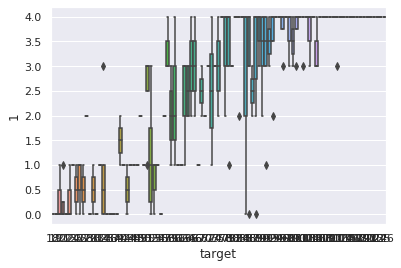

In [0]:
import pandas as pd
dt = pd.read_csv('fim8.csv')
print(dt)
df = pd.DataFrame(dt)
print(df)
print(df.columns)
print(df.columns[[0]])
print(df.drop(df.columns[[0]], axis=1))
dtt=df.drop(df.columns[[0]], axis=1)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set()
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(x="target", y="1", data=dtt)

import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import r2_score

import random

from pandas.plotting import scatter_matrix



------------------------------------------------------------
(300, 102)
                s           n          F1  ...          78          79         80
count  300.000000  300.000000  300.000000  ...  300.000000  300.000000  300.00000
mean     0.320000   67.126667    5.296667  ...    2.320000    1.653333    2.46000
std      0.467256   13.667967    2.032015  ...    0.734437    1.147845    0.88185
min      0.000000   18.000000    1.000000  ...    0.000000    0.000000    0.00000
25%      0.000000   57.750000    5.000000  ...    2.000000    0.000000    2.00000
50%      0.000000   69.000000    6.000000  ...    2.000000    2.000000    3.00000
75%      1.000000   78.000000    7.000000  ...    3.000000    3.000000    3.00000
max      1.000000   95.000000    7.000000  ...    3.000000    3.000000    3.00000

[8 rows x 103 columns]
------------------------------------------------------------
sika.shape (82, 300)
X.shape (300, 82)
Create_Description_X 後の X.shape (300, 82)
Objective_variable_creat

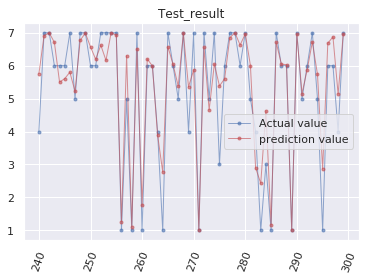

他のモデルでも評価------------------------------------------------------------
決定木 sklearn_tree
平均絶対誤差 (MAE, Mean Absolute Error
0.5333333333333333
二乗平均平方根誤差（RMSE）
0.7872676671372173
test_r2_score
0.8052453908075825


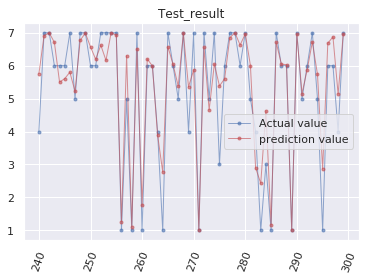

他のモデルでも評価------------------------------------------------------------
RandomForestClassifier
平均絶対誤差 (MAE, Mean Absolute Error
0.5
二乗平均平方根誤差（RMSE）
0.7872676671372173
test_r2_score
0.8052453908075825


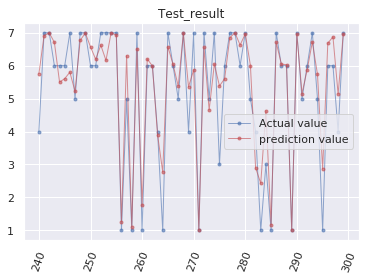

他のモデルでも評価------------------------------------------------------------
XGBoost accuracy_score
平均絶対誤差 (MAE, Mean Absolute Error
0.45
二乗平均平方根誤差（RMSE）
0.7872676671372173
test_r2_score
0.855881589197611


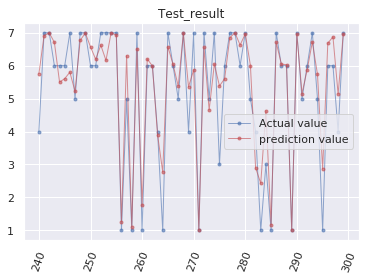

In [0]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

print("------------------------------------------------------------")

print(dtt.shape)
print(df.describe())

print("------------------------------------------------------------")

#説明変数入力用
def Create_Description_X(df):
 s = df['s'].values
 n = df['n'].values
 p1 = df['1'].values
 p2 = df['2'].values
 p3 = df['3'].values
 p4 = df['4'].values
 p5 = df['5'].values
 p6 = df['6'].values
 p7 = df['7'].values
 p8 = df['8'].values
 p9 = df['9'].values
 p10 = df['10'].values
 p11 = df['11'].values
 p12 = df['12'].values
 p13 = df['13'].values
 p14 = df['14'].values
 p15 = df['15'].values
 p16 = df['16'].values
 p17 = df['17'].values
 p18 = df['18'].values
 p19 = df['19'].values
 p20 = df['20'].values
 p21 = df['21'].values
 p22 = df['22'].values
 p23 = df['23'].values
 p24 = df['24'].values
 p25 = df['25'].values
 p26 = df['26'].values
 p27 = df['27'].values
 p28 = df['28'].values
 p29 = df['29'].values
 p30 = df['30'].values
 p31 = df['31'].values
 p32 = df['32'].values
 p33 = df['33'].values
 p34 = df['34'].values
 p35 = df['35'].values
 p36 = df['36'].values
 p37 = df['37'].values
 p38 = df['38'].values
 p39 = df['39'].values
 p40 = df['40'].values
 p41 = df['41'].values
 p42 = df['42'].values
 p43 = df['43'].values
 p44 = df['44'].values
 p45 = df['45'].values
 p46 = df['46'].values
 p47 = df['47'].values
 p48 = df['48'].values
 p49 = df['49'].values
 p50 = df['50'].values
 p51 = df['51'].values
 p52 = df['52'].values
 p53 = df['53'].values
 p54 = df['54'].values
 p55 = df['55'].values
 p56 = df['56'].values
 p57 = df['57'].values
 p58 = df['58'].values
 p59 = df['59'].values
 p60 = df['60'].values
 p61 = df['61'].values
 p62 = df['62'].values
 p63 = df['63'].values
 p64 = df['64'].values
 p65 = df['65'].values
 p66 = df['66'].values
 p67 = df['67'].values
 p68 = df['68'].values
 p69 = df['69'].values
 p70 = df['70'].values
 p71 = df['71'].values
 p72 = df['72'].values
 p73 = df['73'].values
 p74 = df['74'].values
 p75 = df['75'].values
 p76 = df['76'].values
 p77 = df['77'].values
 p78 = df['78'].values
 p79 = df['79'].values
 p80 = df['80'].values
 #説明変数作成
 sika=np.array([s,n,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38,p39,p40,p41,p42,p43,p44,p45,p46,p47,p48,p49,p50,p51,p52,p53,p54,p55,p56,p57,p58,p59,p60,p61,p62,p63,p64,p65,p66,p67,p68,p69,p70,p71,p72,p73,p74,p75,p76,p77,p78,p79,p80])
 print("sika.shape",sika.shape)
 X=sika.T
 print("X.shape",X.shape)
 return X

#説明変数Create_Description_X実施これでXに値が入るはず
X = Create_Description_X(df)
print("Create_Description_X 後の X.shape",X.shape)

#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F1'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print("Objective_variable_creationY 後の Y.shape",Y.shape)

# 訓練用のデータと、テスト用のデータに分ける関数
def Test_data_and_training_data_split(df,X,Y):
 N_train = int(len(df) * 0.80)
 N_test = len(df) - N_train
 X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=N_test) 
 return X_train, X_test, y_train, y_test

# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)

print("X_train",X_train.shape)
print("Y_train",y_train.shape)
print("X_test",X_test.shape)
print("Y_test",y_test.shape)

print("------------------------------------------------------------")

print("ここから特徴量評価------------------------------------------------------------")

#light GBM関数
def Test_lightgbm(X_train, X_test, y_train, y_test):
 import lightgbm as lgb
 # データを格納する
 lgb_train = lgb.Dataset(X_train, y_train)
 lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
 # 学習条件を設定
 params = {'task': 'train',
          'metric':{'l2'},
          'boosting_type': 'gbdt',
          'learning_rate': 0.02,
          'num_leaves': 23,
          'min_data_in_leaf': 1,
          'num_iteration': 1000,
          'verbose': 0,
          'objective': 'multiclass',
          'num_class': 7
          }
 # 学習する
 model = lgb.train(params,
                  lgb_train,
                  num_boost_round=50,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=100)

 # テストデータで予測する
 y_pred = model.predict(X_test, num_iteration=model.best_iteration)
 y_pred_max = np.argmax(y_pred)

 # Accuracy を計算する
 accuracy = sum(y_test == y_pred_max) / len(y_test)
 print('accuracy:', accuracy)

 # importanceを表示する
 importance = pd.DataFrame(model.feature_importance(), columns=['importance'] )
 #display(importance)
 #np.set_printoptions(threshold=np.inf)
 #print(importance)
 # テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
 Y_pred = model.predict(X_test)
 return Y_pred

#Test_lightgbm関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

print("ここまで特徴量評価------------------------------------------------------------")

# テスト結果を評価する,Test_result()関数
def Test_result(Y_pred, y_test):
 from sklearn.model_selection import cross_val_score
 from sklearn.linear_model import LogisticRegression
 from sklearn import svm  
 from sklearn.metrics import accuracy_score
 import lightgbm as lgb
 from sklearn.metrics import r2_score
 print("light GBM") 
 # テスト結果を評価する,accuracy_score()
 #print("予測対象X：", y_test, ", 予測結果→", Y_pred)
 from sklearn.metrics import mean_absolute_error
 print("平均絶対誤差 (MAE, Mean Absolute Error") 
 print(mean_absolute_error(y_test, Y_pred))
 ## RMSEの計算
 print("二乗平均平方根誤差（RMSE）")
 print(np.sqrt(mean_squared_error(y_test,Y_pred)))
 ## test_r2_score計算
 test_r2_score = r2_score(y_test,Y_pred)
 print("test_r2_score")
 print(test_r2_score)
 ## 予測結果をプロット
 pre_date = df.index[-len(y_test):].values
 plt.title("Test_result")
 plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="Actual value", linewidth=1)
 plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="prediction value", linewidth=1)
 plt.xticks(rotation=70)
 plt.legend()
 plt.grid(True)
 plt.show()

#Test_result関数の実施
Test_result(Y_pred, y_test)

print("他のモデルでも評価------------------------------------------------------------")


#決定木関数の作成
def sklearn_tree_test_result(X_train, X_test, y_train, y_test):
 from sklearn.tree import DecisionTreeClassifier 
 dt = DecisionTreeClassifier()
 dt.fit(X_train,y_train)
 y_pred = dt.predict(X_test)
 #print("決定木accuracy_score : {}".format(accuracy_score(y_test,y_pred)))
 print("決定木 sklearn_tree") 
 ## 平均絶対誤差の計算
 from sklearn.metrics import mean_absolute_error
 print("平均絶対誤差 (MAE, Mean Absolute Error") 
 print(mean_absolute_error(y_test, y_pred))
 ## RMSEの計算
 print("二乗平均平方根誤差（RMSE）")
 print(np.sqrt(mean_squared_error(y_test,Y_pred)))
 ## test_r2_score計算
 test_r2_score = r2_score(y_test,y_pred)
 print("test_r2_score")
 print(test_r2_score)
 ## 予測結果をプロット
 pre_date = df.index[-len(y_test):].values
 plt.title("Test_result")
 plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="Actual value", linewidth=1)
 plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="prediction value", linewidth=1)
 plt.xticks(rotation=70)
 plt.legend()
 plt.grid(True)
 plt.show()


#決定木関数の実行
sklearn_tree_test_result(X_train, X_test, y_train, y_test)

print("他のモデルでも評価------------------------------------------------------------")
 
#ランダムフォレスト関数の作成
def RandomForestClassifier_test_result(X_train, X_test, y_train, y_test):
 from sklearn.ensemble import RandomForestClassifier
 rf = RandomForestClassifier()
 rf.fit(X_train,y_train)
 y_pred = rf.predict(X_test)
 print("RandomForestClassifier")
 ## 平均絶対誤差の計算
 from sklearn.metrics import mean_absolute_error
 print("平均絶対誤差 (MAE, Mean Absolute Error") 
 print(mean_absolute_error(y_test, y_pred))
 ## RMSEの計算
 print("二乗平均平方根誤差（RMSE）")
 print(np.sqrt(mean_squared_error(y_test,Y_pred)))
 ## test_r2_score計算
 test_r2_score = r2_score(y_test,y_pred)
 print("test_r2_score")
 print(test_r2_score)
 ## 予測結果をプロット
 pre_date = df.index[-len(y_test):].values
 plt.title("Test_result")
 plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="Actual value", linewidth=1)
 plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="prediction value", linewidth=1)
 plt.xticks(rotation=70)
 plt.legend()
 plt.grid(True)
 plt.show()

#ランダムフォレスト関数の実行
RandomForestClassifier_test_result(X_train, X_test, y_train, y_test)

print("他のモデルでも評価------------------------------------------------------------")

#XGBoost関数の作成
def XGBoost_test_result(X_train, X_test, y_train, y_test):
 import xgboost as xgb
 from xgboost import XGBClassifier
 xgb = xgb.XGBClassifier(booster="gbtree",silent=0,seed=2019)
 xgb.fit(X_train,y_train)
 y_pred = xgb.predict(X_test)
 print("XGBoost accuracy_score")
 ## 平均絶対誤差の計算
 from sklearn.metrics import mean_absolute_error
 print("平均絶対誤差 (MAE, Mean Absolute Error") 
 print(mean_absolute_error(y_test, y_pred))
 ## RMSEの計算
 print("二乗平均平方根誤差（RMSE）")
 print(np.sqrt(mean_squared_error(y_test,Y_pred)))
 ## test_r2_score計算
 test_r2_score = r2_score(y_test,y_pred)
 print("test_r2_score")
 print(test_r2_score)
 ## 予測結果をプロット
 pre_date = df.index[-len(y_test):].values
 plt.title("Test_result")
 plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="Actual value", linewidth=1)
 plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="prediction value", linewidth=1)
 plt.xticks(rotation=70)
 plt.legend()
 plt.grid(True)
 plt.show()

XGBoost_test_result(X_train, X_test, y_train, y_test)


Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 3.59369
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 3.48208
[3]	valid_0's l2: 3.37407
[4]	valid_0's l2: 3.26693
[5]	valid_0's l2: 3.16436
[6]	valid_0's l2: 3.06962
[7]	valid_0's l2: 2.97667
[8]	valid_0's l2: 2.89183
[9]	valid_0's l2: 2.80935
[10]	valid_0's l2: 2.72607
[11]	valid_0's l2: 2.65054
[12]	valid_0's l2: 2.57415
[13]	valid_0's l2: 2.50029
[14]	valid_0's l2: 2.43157
[15]	valid_0's l2: 2.36287
[16]	valid_0's l2: 2.29926
[17]	valid_0's l2: 2.23696
[18]	valid_0's l2: 2.18005
[19]	valid_0's l2: 2.12308
[20]	valid_0's l2: 2.07154
[21]	valid_0's l2: 2.01857
[22]	valid_0's l2: 1.96813
[23]	valid_0's l2: 1.9217
[24]	valid_0's l2: 1.87614
[25]	valid_0's l2: 1.83163
[26]	valid_0's l2: 1.79359
[27]	valid_0's l2: 1.75251
[28]	valid_0's l2: 1.71676
[29]	valid_0's l2: 1.67945
[30]	valid_0's l2: 1.64471
[31]	valid_0's l2: 1.61232
[32]	valid_0's l2: 1.5787
[33]	valid_0's l2: 1.55219
[34]	valid

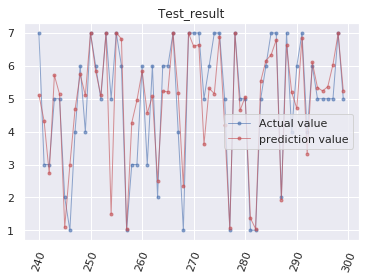

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F2'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print("Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 4.92228
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 4.75517
[3]	valid_0's l2: 4.59989
[4]	valid_0's l2: 4.43902
[5]	valid_0's l2: 4.29456
[6]	valid_0's l2: 4.15721
[7]	valid_0's l2: 4.02026
[8]	valid_0's l2: 3.8921
[9]	valid_0's l2: 3.76602
[10]	valid_0's l2: 3.64519
[11]	valid_0's l2: 3.53228
[12]	valid_0's l2: 3.42907
[13]	valid_0's l2: 3.32032
[14]	valid_0's l2: 3.21908
[15]	valid_0's l2: 3.12443
[16]	valid_0's l2: 3.02813
[17]	valid_0's l2: 2.9391
[18]	valid_0's l2: 2.85632
[19]	valid_0's l2: 2.7743
[20]	valid_0's l2: 2.70133
[21]	valid_0's l2: 2.63164
[22]	valid_0's l2: 2.56532
[23]	valid_0's l2: 2.49874
[24]	valid_0's l2: 2.43719
[25]	valid_0's l2: 2.37551
[26]	valid_0's l2: 2.31467
[27]	valid_0's l2: 2.26036
[28]	valid_0's l2: 2.21072
[29]	valid_0's l2: 2.15721
[30]	valid_0's l2: 2.10766
[31]	valid_0's l2: 2.06064
[32]	valid_0's l2: 2.0162
[33]	valid_0's l2: 1.97118
[34]	valid_0

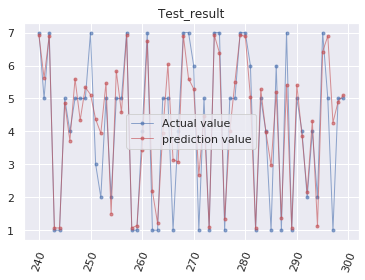

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F3'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print("Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 4.59746
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 4.4454
[3]	valid_0's l2: 4.30132
[4]	valid_0's l2: 4.16
[5]	valid_0's l2: 4.02682
[6]	valid_0's l2: 3.89797
[7]	valid_0's l2: 3.77461
[8]	valid_0's l2: 3.65606
[9]	valid_0's l2: 3.54198
[10]	valid_0's l2: 3.43308
[11]	valid_0's l2: 3.32901
[12]	valid_0's l2: 3.22786
[13]	valid_0's l2: 3.13376
[14]	valid_0's l2: 3.04107
[15]	valid_0's l2: 2.95201
[16]	valid_0's l2: 2.86752
[17]	valid_0's l2: 2.78618
[18]	valid_0's l2: 2.71135
[19]	valid_0's l2: 2.63778
[20]	valid_0's l2: 2.56711
[21]	valid_0's l2: 2.50131
[22]	valid_0's l2: 2.43574
[23]	valid_0's l2: 2.37238
[24]	valid_0's l2: 2.30974
[25]	valid_0's l2: 2.25526
[26]	valid_0's l2: 2.20149
[27]	valid_0's l2: 2.14624
[28]	valid_0's l2: 2.0959
[29]	valid_0's l2: 2.04551
[30]	valid_0's l2: 2.00149
[31]	valid_0's l2: 1.95617
[32]	valid_0's l2: 1.91085
[33]	valid_0's l2: 1.86967
[34]	valid_0'

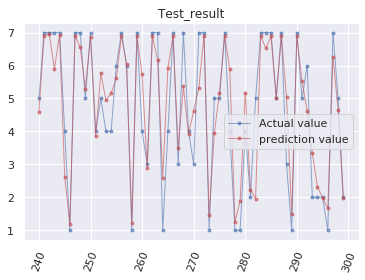

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F4'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print("Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 4.44041
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 4.27347
[3]	valid_0's l2: 4.11258
[4]	valid_0's l2: 3.95729
[5]	valid_0's l2: 3.8104
[6]	valid_0's l2: 3.6689
[7]	valid_0's l2: 3.5331
[8]	valid_0's l2: 3.40362
[9]	valid_0's l2: 3.28141
[10]	valid_0's l2: 3.16109
[11]	valid_0's l2: 3.04555
[12]	valid_0's l2: 2.93586
[13]	valid_0's l2: 2.83246
[14]	valid_0's l2: 2.73354
[15]	valid_0's l2: 2.63412
[16]	valid_0's l2: 2.53822
[17]	valid_0's l2: 2.45165
[18]	valid_0's l2: 2.36658
[19]	valid_0's l2: 2.28556
[20]	valid_0's l2: 2.208
[21]	valid_0's l2: 2.13603
[22]	valid_0's l2: 2.06437
[23]	valid_0's l2: 1.99212
[24]	valid_0's l2: 1.9271
[25]	valid_0's l2: 1.86203
[26]	valid_0's l2: 1.80018
[27]	valid_0's l2: 1.74278
[28]	valid_0's l2: 1.6848
[29]	valid_0's l2: 1.63115
[30]	valid_0's l2: 1.58075
[31]	valid_0's l2: 1.53153
[32]	valid_0's l2: 1.48488
[33]	valid_0's l2: 1.44046
[34]	valid_0's 

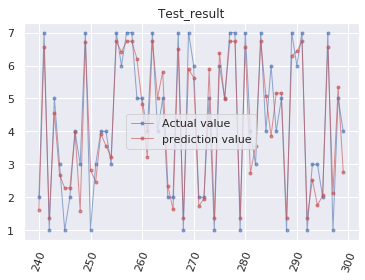

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F5'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print("Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 5.02161
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 4.87099
[3]	valid_0's l2: 4.72492
[4]	valid_0's l2: 4.57916
[5]	valid_0's l2: 4.43637
[6]	valid_0's l2: 4.29826
[7]	valid_0's l2: 4.1678
[8]	valid_0's l2: 4.04779
[9]	valid_0's l2: 3.92624
[10]	valid_0's l2: 3.80827
[11]	valid_0's l2: 3.69388
[12]	valid_0's l2: 3.5881
[13]	valid_0's l2: 3.49173
[14]	valid_0's l2: 3.39481
[15]	valid_0's l2: 3.30272
[16]	valid_0's l2: 3.2116
[17]	valid_0's l2: 3.13183
[18]	valid_0's l2: 3.05074
[19]	valid_0's l2: 2.97146
[20]	valid_0's l2: 2.8962
[21]	valid_0's l2: 2.82305
[22]	valid_0's l2: 2.75299
[23]	valid_0's l2: 2.68443
[24]	valid_0's l2: 2.62585
[25]	valid_0's l2: 2.563
[26]	valid_0's l2: 2.50885
[27]	valid_0's l2: 2.45802
[28]	valid_0's l2: 2.40418
[29]	valid_0's l2: 2.35108
[30]	valid_0's l2: 2.3042
[31]	valid_0's l2: 2.25568
[32]	valid_0's l2: 2.20695
[33]	valid_0's l2: 2.16036
[34]	valid_0's 

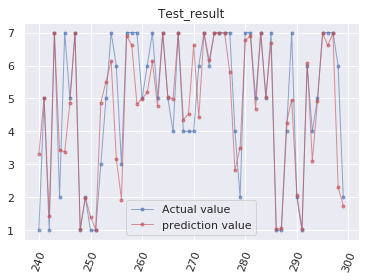

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F6'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print("Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 5.65435
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 5.46222
[3]	valid_0's l2: 5.27614
[4]	valid_0's l2: 5.09917
[5]	valid_0's l2: 4.92978
[6]	valid_0's l2: 4.7649
[7]	valid_0's l2: 4.61179
[8]	valid_0's l2: 4.46229
[9]	valid_0's l2: 4.32218
[10]	valid_0's l2: 4.18908
[11]	valid_0's l2: 4.05849
[12]	valid_0's l2: 3.94074
[13]	valid_0's l2: 3.82088
[14]	valid_0's l2: 3.71241
[15]	valid_0's l2: 3.60555
[16]	valid_0's l2: 3.49981
[17]	valid_0's l2: 3.40468
[18]	valid_0's l2: 3.30638
[19]	valid_0's l2: 3.2113
[20]	valid_0's l2: 3.12427
[21]	valid_0's l2: 3.04324
[22]	valid_0's l2: 2.96667
[23]	valid_0's l2: 2.8904
[24]	valid_0's l2: 2.82089
[25]	valid_0's l2: 2.75064
[26]	valid_0's l2: 2.6864
[27]	valid_0's l2: 2.62786
[28]	valid_0's l2: 2.56609
[29]	valid_0's l2: 2.50976
[30]	valid_0's l2: 2.45061
[31]	valid_0's l2: 2.39996
[32]	valid_0's l2: 2.34405
[33]	valid_0's l2: 2.2946
[34]	valid_0'

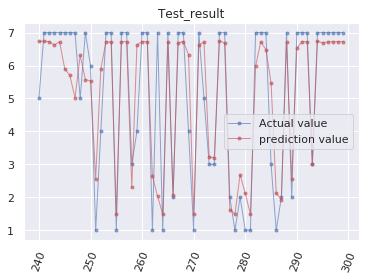

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F7'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print("Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 5.34003
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 5.17775
[3]	valid_0's l2: 5.01934
[4]	valid_0's l2: 4.86775
[5]	valid_0's l2: 4.72283
[6]	valid_0's l2: 4.59327
[7]	valid_0's l2: 4.45959
[8]	valid_0's l2: 4.33418
[9]	valid_0's l2: 4.2049
[10]	valid_0's l2: 4.08703
[11]	valid_0's l2: 3.97242
[12]	valid_0's l2: 3.8644
[13]	valid_0's l2: 3.76158
[14]	valid_0's l2: 3.66082
[15]	valid_0's l2: 3.56693
[16]	valid_0's l2: 3.47033
[17]	valid_0's l2: 3.3792
[18]	valid_0's l2: 3.29695
[19]	valid_0's l2: 3.21918
[20]	valid_0's l2: 3.13896
[21]	valid_0's l2: 3.06248
[22]	valid_0's l2: 2.99221
[23]	valid_0's l2: 2.92261
[24]	valid_0's l2: 2.8609
[25]	valid_0's l2: 2.79778
[26]	valid_0's l2: 2.73959
[27]	valid_0's l2: 2.68657
[28]	valid_0's l2: 2.63082
[29]	valid_0's l2: 2.5769
[30]	valid_0's l2: 2.52291
[31]	valid_0's l2: 2.47341
[32]	valid_0's l2: 2.4227
[33]	valid_0's l2: 2.37944
[34]	valid_0's

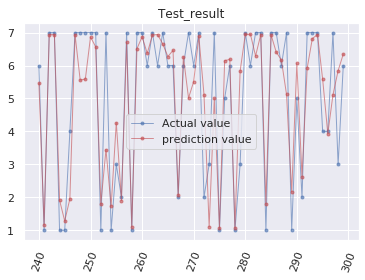

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F8'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print("Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 F8 Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 4.75514
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 4.58725
[3]	valid_0's l2: 4.42886
[4]	valid_0's l2: 4.27721
[5]	valid_0's l2: 4.12905
[6]	valid_0's l2: 3.99174
[7]	valid_0's l2: 3.86029
[8]	valid_0's l2: 3.73666
[9]	valid_0's l2: 3.61388
[10]	valid_0's l2: 3.49637
[11]	valid_0's l2: 3.38571
[12]	valid_0's l2: 3.28238
[13]	valid_0's l2: 3.17714
[14]	valid_0's l2: 3.08872
[15]	valid_0's l2: 3.00047
[16]	valid_0's l2: 2.91583
[17]	valid_0's l2: 2.83298
[18]	valid_0's l2: 2.74955
[19]	valid_0's l2: 2.67501
[20]	valid_0's l2: 2.60358
[21]	valid_0's l2: 2.53268
[22]	valid_0's l2: 2.46385
[23]	valid_0's l2: 2.40017
[24]	valid_0's l2: 2.3297
[25]	valid_0's l2: 2.26703
[26]	valid_0's l2: 2.20485
[27]	valid_0's l2: 2.15639
[28]	valid_0's l2: 2.10544
[29]	valid_0's l2: 2.05078
[30]	valid_0's l2: 2.00299
[31]	valid_0's l2: 1.95237
[32]	valid_0's l2: 1.90038
[33]	valid_0's l2: 1.85402
[34]	

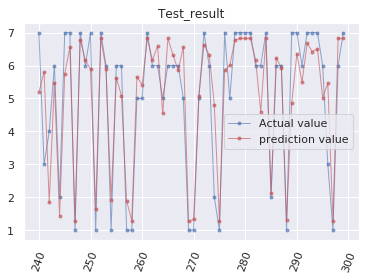

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F8'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" F8 Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 F8 Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 3.93698
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 3.81515
[3]	valid_0's l2: 3.69635
[4]	valid_0's l2: 3.57949
[5]	valid_0's l2: 3.4671
[6]	valid_0's l2: 3.3565
[7]	valid_0's l2: 3.25487
[8]	valid_0's l2: 3.154
[9]	valid_0's l2: 3.05943
[10]	valid_0's l2: 2.96881
[11]	valid_0's l2: 2.88044
[12]	valid_0's l2: 2.79794
[13]	valid_0's l2: 2.71697
[14]	valid_0's l2: 2.6377
[15]	valid_0's l2: 2.56453
[16]	valid_0's l2: 2.49312
[17]	valid_0's l2: 2.42772
[18]	valid_0's l2: 2.36217
[19]	valid_0's l2: 2.29927
[20]	valid_0's l2: 2.2378
[21]	valid_0's l2: 2.1804
[22]	valid_0's l2: 2.12346
[23]	valid_0's l2: 2.06993
[24]	valid_0's l2: 2.01533
[25]	valid_0's l2: 1.96564
[26]	valid_0's l2: 1.91816
[27]	valid_0's l2: 1.87113
[28]	valid_0's l2: 1.82714
[29]	valid_0's l2: 1.78672
[30]	valid_0's l2: 1.74721
[31]	valid_0's l2: 1.70715
[32]	valid_0's l2: 1.67068
[33]	valid_0's l2: 1.63533
[34]	valid_

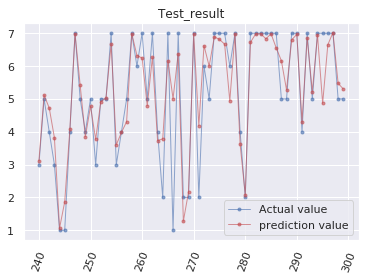

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F9'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" F8 Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 F9 Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 3.86685
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 3.74136
[3]	valid_0's l2: 3.62137
[4]	valid_0's l2: 3.50495
[5]	valid_0's l2: 3.39598
[6]	valid_0's l2: 3.29104
[7]	valid_0's l2: 3.18885
[8]	valid_0's l2: 3.09033
[9]	valid_0's l2: 2.99948
[10]	valid_0's l2: 2.90634
[11]	valid_0's l2: 2.82074
[12]	valid_0's l2: 2.73685
[13]	valid_0's l2: 2.66109
[14]	valid_0's l2: 2.58383
[15]	valid_0's l2: 2.50407
[16]	valid_0's l2: 2.43725
[17]	valid_0's l2: 2.37226
[18]	valid_0's l2: 2.30191
[19]	valid_0's l2: 2.24326
[20]	valid_0's l2: 2.1827
[21]	valid_0's l2: 2.12122
[22]	valid_0's l2: 2.06194
[23]	valid_0's l2: 2.01295
[24]	valid_0's l2: 1.96731
[25]	valid_0's l2: 1.91332
[26]	valid_0's l2: 1.86684
[27]	valid_0's l2: 1.81815
[28]	valid_0's l2: 1.76999
[29]	valid_0's l2: 1.73241
[30]	valid_0's l2: 1.6972
[31]	valid_0's l2: 1.65973
[32]	valid_0's l2: 1.61953
[33]	valid_0's l2: 1.58056
[34]	v

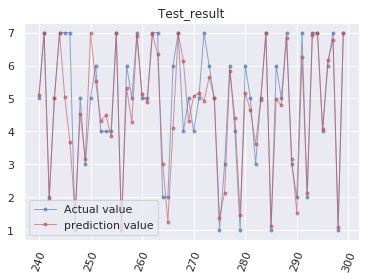

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F9'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" F9 Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 F10 Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 3.46705
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 3.34213
[3]	valid_0's l2: 3.21823
[4]	valid_0's l2: 3.10184
[5]	valid_0's l2: 2.98812
[6]	valid_0's l2: 2.88246
[7]	valid_0's l2: 2.77828
[8]	valid_0's l2: 2.68343
[9]	valid_0's l2: 2.5891
[10]	valid_0's l2: 2.49953
[11]	valid_0's l2: 2.41428
[12]	valid_0's l2: 2.33119
[13]	valid_0's l2: 2.25212
[14]	valid_0's l2: 2.17739
[15]	valid_0's l2: 2.10464
[16]	valid_0's l2: 2.03521
[17]	valid_0's l2: 1.97037
[18]	valid_0's l2: 1.90601
[19]	valid_0's l2: 1.84595
[20]	valid_0's l2: 1.7875
[21]	valid_0's l2: 1.73203
[22]	valid_0's l2: 1.67833
[23]	valid_0's l2: 1.62766
[24]	valid_0's l2: 1.57858
[25]	valid_0's l2: 1.53236
[26]	valid_0's l2: 1.48752
[27]	valid_0's l2: 1.44419
[28]	valid_0's l2: 1.40312
[29]	valid_0's l2: 1.36426
[30]	valid_0's l2: 1.32717
[31]	valid_0's l2: 1.291
[32]	valid_0's l2: 1.25677
[33]	valid_0's l2: 1.22551
[34]	va

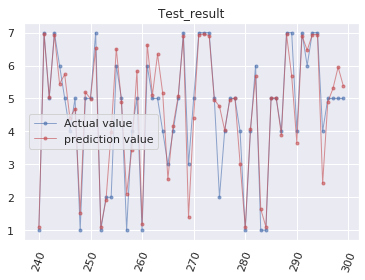

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F10'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" F10 Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 F11 Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 4.94424
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 4.78262
[3]	valid_0's l2: 4.62675
[4]	valid_0's l2: 4.47833
[5]	valid_0's l2: 4.33393
[6]	valid_0's l2: 4.19693
[7]	valid_0's l2: 4.07217
[8]	valid_0's l2: 3.95344
[9]	valid_0's l2: 3.83898
[10]	valid_0's l2: 3.72703
[11]	valid_0's l2: 3.62638
[12]	valid_0's l2: 3.52696
[13]	valid_0's l2: 3.43062
[14]	valid_0's l2: 3.33543
[15]	valid_0's l2: 3.24246
[16]	valid_0's l2: 3.15843
[17]	valid_0's l2: 3.07439
[18]	valid_0's l2: 2.99334
[19]	valid_0's l2: 2.91999
[20]	valid_0's l2: 2.84873
[21]	valid_0's l2: 2.77878
[22]	valid_0's l2: 2.71542
[23]	valid_0's l2: 2.65362
[24]	valid_0's l2: 2.59123
[25]	valid_0's l2: 2.53288
[26]	valid_0's l2: 2.47798
[27]	valid_0's l2: 2.42361
[28]	valid_0's l2: 2.37318
[29]	valid_0's l2: 2.32592
[30]	valid_0's l2: 2.27667
[31]	valid_0's l2: 2.23061
[32]	valid_0's l2: 2.18686
[33]	valid_0's l2: 2.14159
[34

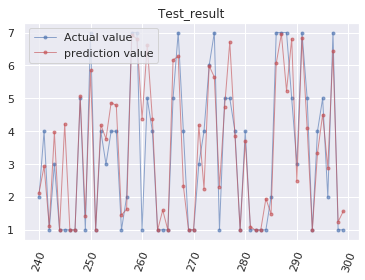

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F11'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" F11 Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 F12 Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 4.81807
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 4.65991
[3]	valid_0's l2: 4.4996
[4]	valid_0's l2: 4.35381
[5]	valid_0's l2: 4.20474
[6]	valid_0's l2: 4.05887
[7]	valid_0's l2: 3.92361
[8]	valid_0's l2: 3.78928
[9]	valid_0's l2: 3.66538
[10]	valid_0's l2: 3.55174
[11]	valid_0's l2: 3.43631
[12]	valid_0's l2: 3.32707
[13]	valid_0's l2: 3.22216
[14]	valid_0's l2: 3.11729
[15]	valid_0's l2: 3.02259
[16]	valid_0's l2: 2.93232
[17]	valid_0's l2: 2.84448
[18]	valid_0's l2: 2.7635
[19]	valid_0's l2: 2.68282
[20]	valid_0's l2: 2.60846
[21]	valid_0's l2: 2.53707
[22]	valid_0's l2: 2.46478
[23]	valid_0's l2: 2.39898
[24]	valid_0's l2: 2.33199
[25]	valid_0's l2: 2.26987
[26]	valid_0's l2: 2.2094
[27]	valid_0's l2: 2.15351
[28]	valid_0's l2: 2.0967
[29]	valid_0's l2: 2.04488
[30]	valid_0's l2: 1.99218
[31]	valid_0's l2: 1.94482
[32]	valid_0's l2: 1.89502
[33]	valid_0's l2: 1.84843
[34]	va

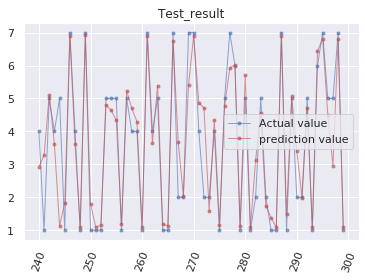

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F12'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" F12 Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 F13 Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 4.99261
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 4.84305
[3]	valid_0's l2: 4.69976
[4]	valid_0's l2: 4.57199
[5]	valid_0's l2: 4.43999
[6]	valid_0's l2: 4.31734
[7]	valid_0's l2: 4.20364
[8]	valid_0's l2: 4.09376
[9]	valid_0's l2: 3.99244
[10]	valid_0's l2: 3.88335
[11]	valid_0's l2: 3.79154
[12]	valid_0's l2: 3.69793
[13]	valid_0's l2: 3.61046
[14]	valid_0's l2: 3.51789
[15]	valid_0's l2: 3.4385
[16]	valid_0's l2: 3.35347
[17]	valid_0's l2: 3.28092
[18]	valid_0's l2: 3.20267
[19]	valid_0's l2: 3.13187
[20]	valid_0's l2: 3.06185
[21]	valid_0's l2: 2.99871
[22]	valid_0's l2: 2.92892
[23]	valid_0's l2: 2.86521
[24]	valid_0's l2: 2.80077
[25]	valid_0's l2: 2.74433
[26]	valid_0's l2: 2.68593
[27]	valid_0's l2: 2.62898
[28]	valid_0's l2: 2.57749
[29]	valid_0's l2: 2.52654
[30]	valid_0's l2: 2.47606
[31]	valid_0's l2: 2.42452
[32]	valid_0's l2: 2.38152
[33]	valid_0's l2: 2.33689
[34]

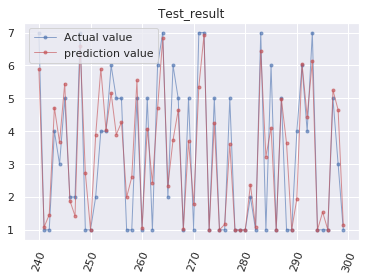

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F13'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" F13 Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 F13 Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 4.11052
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 3.98144
[3]	valid_0's l2: 3.85644
[4]	valid_0's l2: 3.73241
[5]	valid_0's l2: 3.61731
[6]	valid_0's l2: 3.50619
[7]	valid_0's l2: 3.40055
[8]	valid_0's l2: 3.29587
[9]	valid_0's l2: 3.19788
[10]	valid_0's l2: 3.10536
[11]	valid_0's l2: 3.01346
[12]	valid_0's l2: 2.92848
[13]	valid_0's l2: 2.84852
[14]	valid_0's l2: 2.77027
[15]	valid_0's l2: 2.69429
[16]	valid_0's l2: 2.62281
[17]	valid_0's l2: 2.55251
[18]	valid_0's l2: 2.48633
[19]	valid_0's l2: 2.42653
[20]	valid_0's l2: 2.36867
[21]	valid_0's l2: 2.31562
[22]	valid_0's l2: 2.25931
[23]	valid_0's l2: 2.20903
[24]	valid_0's l2: 2.16965
[25]	valid_0's l2: 2.12156
[26]	valid_0's l2: 2.07493
[27]	valid_0's l2: 2.03704
[28]	valid_0's l2: 1.99518
[29]	valid_0's l2: 1.95587
[30]	valid_0's l2: 1.91364
[31]	valid_0's l2: 1.87242
[32]	valid_0's l2: 1.83786
[33]	valid_0's l2: 1.80623
[34

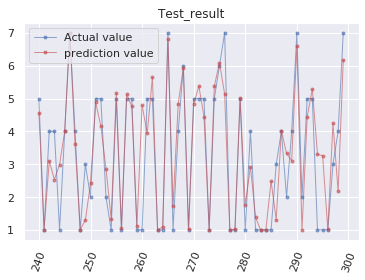

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F13'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" F13 Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 F14 Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 560.126
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 538.562
[3]	valid_0's l2: 518.009
[4]	valid_0's l2: 498.105
[5]	valid_0's l2: 479.211
[6]	valid_0's l2: 460.8
[7]	valid_0's l2: 443.571
[8]	valid_0's l2: 426.79
[9]	valid_0's l2: 410.836
[10]	valid_0's l2: 395.639
[11]	valid_0's l2: 380.837
[12]	valid_0's l2: 366.836
[13]	valid_0's l2: 353.368
[14]	valid_0's l2: 340.391
[15]	valid_0's l2: 327.681
[16]	valid_0's l2: 315.827
[17]	valid_0's l2: 304.077
[18]	valid_0's l2: 292.899
[19]	valid_0's l2: 282.341
[20]	valid_0's l2: 272.153
[21]	valid_0's l2: 262.421
[22]	valid_0's l2: 252.993
[23]	valid_0's l2: 244.081
[24]	valid_0's l2: 235.45
[25]	valid_0's l2: 227.231
[26]	valid_0's l2: 219.433
[27]	valid_0's l2: 211.66
[28]	valid_0's l2: 204.523
[29]	valid_0's l2: 197.564
[30]	valid_0's l2: 190.839
[31]	valid_0's l2: 184.484
[32]	valid_0's l2: 178.714
[33]	valid_0's l2: 173.302
[34]	val

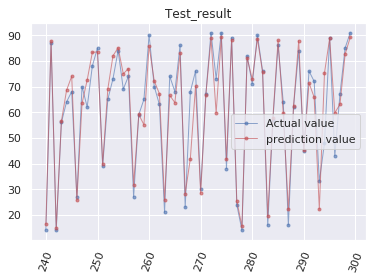

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F14'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" F14 Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 F15 Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 2.90775
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.80163
[3]	valid_0's l2: 2.6964
[4]	valid_0's l2: 2.60004
[5]	valid_0's l2: 2.50469
[6]	valid_0's l2: 2.41811
[7]	valid_0's l2: 2.33381
[8]	valid_0's l2: 2.25393
[9]	valid_0's l2: 2.17562
[10]	valid_0's l2: 2.09818
[11]	valid_0's l2: 2.027
[12]	valid_0's l2: 1.95998
[13]	valid_0's l2: 1.89185
[14]	valid_0's l2: 1.82876
[15]	valid_0's l2: 1.7691
[16]	valid_0's l2: 1.70843
[17]	valid_0's l2: 1.65338
[18]	valid_0's l2: 1.60137
[19]	valid_0's l2: 1.54738
[20]	valid_0's l2: 1.50209
[21]	valid_0's l2: 1.45234
[22]	valid_0's l2: 1.40953
[23]	valid_0's l2: 1.36864
[24]	valid_0's l2: 1.32779
[25]	valid_0's l2: 1.29222
[26]	valid_0's l2: 1.25914
[27]	valid_0's l2: 1.22555
[28]	valid_0's l2: 1.19415
[29]	valid_0's l2: 1.16493
[30]	valid_0's l2: 1.13499
[31]	valid_0's l2: 1.10714
[32]	valid_0's l2: 1.07972
[33]	valid_0's l2: 1.05397
[34]	va

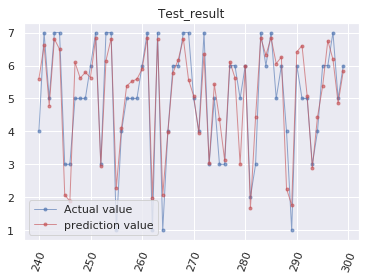

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F15'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" F15 Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 F16 Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 2.94485
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.83734
[3]	valid_0's l2: 2.73283
[4]	valid_0's l2: 2.63395
[5]	valid_0's l2: 2.53874
[6]	valid_0's l2: 2.44672
[7]	valid_0's l2: 2.35888
[8]	valid_0's l2: 2.27514
[9]	valid_0's l2: 2.19442
[10]	valid_0's l2: 2.1166
[11]	valid_0's l2: 2.04339
[12]	valid_0's l2: 1.97171
[13]	valid_0's l2: 1.90293
[14]	valid_0's l2: 1.83757
[15]	valid_0's l2: 1.77454
[16]	valid_0's l2: 1.71412
[17]	valid_0's l2: 1.65706
[18]	valid_0's l2: 1.60129
[19]	valid_0's l2: 1.54924
[20]	valid_0's l2: 1.49703
[21]	valid_0's l2: 1.4487
[22]	valid_0's l2: 1.40258
[23]	valid_0's l2: 1.35806
[24]	valid_0's l2: 1.31451
[25]	valid_0's l2: 1.27395
[26]	valid_0's l2: 1.23344
[27]	valid_0's l2: 1.19571
[28]	valid_0's l2: 1.15942
[29]	valid_0's l2: 1.12411
[30]	valid_0's l2: 1.09088
[31]	valid_0's l2: 1.06012
[32]	valid_0's l2: 1.02958
[33]	valid_0's l2: 0.999038
[34]

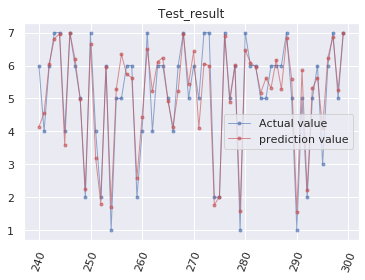

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F16'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" F16 Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 F17 Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 3.62812
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 3.5348
[3]	valid_0's l2: 3.44626
[4]	valid_0's l2: 3.36038
[5]	valid_0's l2: 3.27916
[6]	valid_0's l2: 3.19996
[7]	valid_0's l2: 3.12442
[8]	valid_0's l2: 3.04827
[9]	valid_0's l2: 2.97559
[10]	valid_0's l2: 2.89844
[11]	valid_0's l2: 2.82277
[12]	valid_0's l2: 2.75395
[13]	valid_0's l2: 2.68854
[14]	valid_0's l2: 2.6256
[15]	valid_0's l2: 2.57149
[16]	valid_0's l2: 2.51337
[17]	valid_0's l2: 2.45801
[18]	valid_0's l2: 2.40934
[19]	valid_0's l2: 2.35785
[20]	valid_0's l2: 2.30876
[21]	valid_0's l2: 2.27024
[22]	valid_0's l2: 2.22455
[23]	valid_0's l2: 2.18169
[24]	valid_0's l2: 2.13762
[25]	valid_0's l2: 2.10407
[26]	valid_0's l2: 2.06446
[27]	valid_0's l2: 2.0316
[28]	valid_0's l2: 1.99848
[29]	valid_0's l2: 1.96611
[30]	valid_0's l2: 1.938
[31]	valid_0's l2: 1.9041
[32]	valid_0's l2: 1.87913
[33]	valid_0's l2: 1.84969
[34]	vali

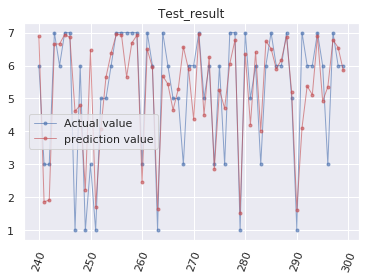

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F17'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" F17 Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 F18 Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 3.64359
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 3.51609
[3]	valid_0's l2: 3.39376
[4]	valid_0's l2: 3.28025
[5]	valid_0's l2: 3.17017
[6]	valid_0's l2: 3.06565
[7]	valid_0's l2: 2.96438
[8]	valid_0's l2: 2.86896
[9]	valid_0's l2: 2.77272
[10]	valid_0's l2: 2.6821
[11]	valid_0's l2: 2.59512
[12]	valid_0's l2: 2.50677
[13]	valid_0's l2: 2.42823
[14]	valid_0's l2: 2.35118
[15]	valid_0's l2: 2.2718
[16]	valid_0's l2: 2.20229
[17]	valid_0's l2: 2.12953
[18]	valid_0's l2: 2.06539
[19]	valid_0's l2: 1.99876
[20]	valid_0's l2: 1.93684
[21]	valid_0's l2: 1.87617
[22]	valid_0's l2: 1.81962
[23]	valid_0's l2: 1.7635
[24]	valid_0's l2: 1.71322
[25]	valid_0's l2: 1.66607
[26]	valid_0's l2: 1.6182
[27]	valid_0's l2: 1.57366
[28]	valid_0's l2: 1.52811
[29]	valid_0's l2: 1.48824
[30]	valid_0's l2: 1.44965
[31]	valid_0's l2: 1.41272
[32]	valid_0's l2: 1.37323
[33]	valid_0's l2: 1.33835
[34]	va

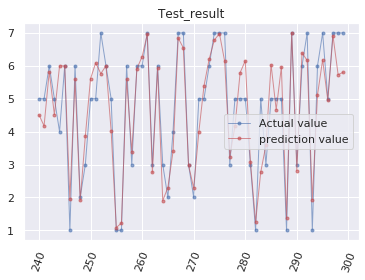

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F18'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" F18 Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 F19 Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 4.49327
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 4.35138
[3]	valid_0's l2: 4.21593
[4]	valid_0's l2: 4.06971
[5]	valid_0's l2: 3.94668
[6]	valid_0's l2: 3.83775
[7]	valid_0's l2: 3.71497
[8]	valid_0's l2: 3.61697
[9]	valid_0's l2: 3.51675
[10]	valid_0's l2: 3.4258
[11]	valid_0's l2: 3.33796
[12]	valid_0's l2: 3.24641
[13]	valid_0's l2: 3.14919
[14]	valid_0's l2: 3.07673
[15]	valid_0's l2: 2.99138
[16]	valid_0's l2: 2.90828
[17]	valid_0's l2: 2.82977
[18]	valid_0's l2: 2.75231
[19]	valid_0's l2: 2.67962
[20]	valid_0's l2: 2.60963
[21]	valid_0's l2: 2.53903
[22]	valid_0's l2: 2.47392
[23]	valid_0's l2: 2.41243
[24]	valid_0's l2: 2.35141
[25]	valid_0's l2: 2.29519
[26]	valid_0's l2: 2.24173
[27]	valid_0's l2: 2.18969
[28]	valid_0's l2: 2.14087
[29]	valid_0's l2: 2.0927
[30]	valid_0's l2: 2.0437
[31]	valid_0's l2: 1.99987
[32]	valid_0's l2: 1.95599
[33]	valid_0's l2: 1.91734
[34]	v

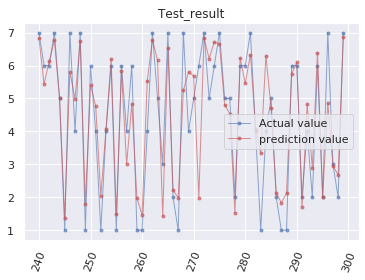

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F19'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" F19 Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 F20 Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 65.8131
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 63.5327
[3]	valid_0's l2: 61.3032
[4]	valid_0's l2: 59.1944
[5]	valid_0's l2: 57.1365
[6]	valid_0's l2: 55.1714
[7]	valid_0's l2: 53.3064
[8]	valid_0's l2: 51.5337
[9]	valid_0's l2: 49.8141
[10]	valid_0's l2: 48.1845
[11]	valid_0's l2: 46.6116
[12]	valid_0's l2: 45.1102
[13]	valid_0's l2: 43.6588
[14]	valid_0's l2: 42.3562
[15]	valid_0's l2: 41.0314
[16]	valid_0's l2: 39.7494
[17]	valid_0's l2: 38.5613
[18]	valid_0's l2: 37.4296
[19]	valid_0's l2: 36.3407
[20]	valid_0's l2: 35.1968
[21]	valid_0's l2: 34.1081
[22]	valid_0's l2: 33.1617
[23]	valid_0's l2: 32.1764
[24]	valid_0's l2: 31.2301
[25]	valid_0's l2: 30.3075
[26]	valid_0's l2: 29.453
[27]	valid_0's l2: 28.6581
[28]	valid_0's l2: 27.8525
[29]	valid_0's l2: 27.1309
[30]	valid_0's l2: 26.4492
[31]	valid_0's l2: 25.7884
[32]	valid_0's l2: 25.1552
[33]	valid_0's l2: 24.5231
[34]

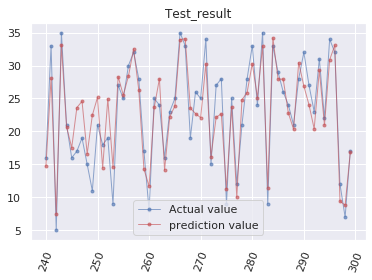

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['F20'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" F20 Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

 target Objective_variable_creationY 後の Y.shape (300,)
[1]	valid_0's l2: 731.077
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 703.582
[3]	valid_0's l2: 677.483
[4]	valid_0's l2: 652.196
[5]	valid_0's l2: 628.185
[6]	valid_0's l2: 606.21
[7]	valid_0's l2: 584.06
[8]	valid_0's l2: 562.638
[9]	valid_0's l2: 542.344
[10]	valid_0's l2: 522.734
[11]	valid_0's l2: 504.589
[12]	valid_0's l2: 486.441
[13]	valid_0's l2: 468.883
[14]	valid_0's l2: 452.175
[15]	valid_0's l2: 436.624
[16]	valid_0's l2: 421.299
[17]	valid_0's l2: 406.814
[18]	valid_0's l2: 393.199
[19]	valid_0's l2: 379.658
[20]	valid_0's l2: 366.83
[21]	valid_0's l2: 354.747
[22]	valid_0's l2: 342.937
[23]	valid_0's l2: 331.759
[24]	valid_0's l2: 321.02
[25]	valid_0's l2: 310.476
[26]	valid_0's l2: 300.579
[27]	valid_0's l2: 291.333
[28]	valid_0's l2: 281.893
[29]	valid_0's l2: 273.135
[30]	valid_0's l2: 264.137
[31]	valid_0's l2: 256.401
[32]	valid_0's l2: 248.551
[33]	valid_0's l2: 240.672
[34]

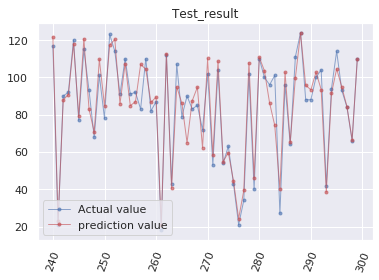

In [0]:
#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['target'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print(" target Objective_variable_creationY 後の Y.shape",Y.shape)


# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
#lightgbm　　Test_result関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

#lightgbm　　Test_result関数の実施
Test_result(Y_pred, y_test)

In [0]:
#ここまで各項目の予測

In [0]:
#例えば1週間後の値を確認する
from google.colab import files
uploaded = files.upload()
import pandas as pd
week = pd.read_csv('fim8,1week_after_exsample.csv')
print(week)
weekafter = pd.DataFrame(week)

In [0]:

#1週間後の値のうちX_testのみを変える変数入力用
#この先はどのようなデータが準備できるかで　結果が変わってくるため一度カンファする
#1週間後の今までのデータがある場合そのデータを活用して学習させたうえで見るのもあり
#加えて目的変数が外れてた場合、ピックアップできるとめちゃくちゃいい


def Create_Description_X_test(weekafter):
 s = weekafter['s'].values
 n = weekafter['n'].values
 p1 = weekafter['1'].values
 p2 = weekafter['2'].values
 p3 = weekafter['3'].values
 p4 = weekafter['4'].values
 p5 = weekafter['5'].values
 p6 = weekafter['6'].values
 p7 = weekafter['7'].values
 p8 = weekafter['8'].values
 p9 = weekafter['9'].values
 p10 = weekafter['10'].values
 p11 = weekafter['11'].values
 p12 = weekafter['12'].values
 p13 = weekafter['13'].values
 p14 = weekafter['14'].values
 p15 = weekafter['15'].values
 p16 = weekafter['16'].values
 p17 = weekafter['17'].values
 p18 = weekafter['18'].values
 p19 = weekafter['19'].values
 p20 = weekafter['20'].values
 p21 = weekafter['21'].values
 p22 = weekafter['22'].values
 p23 = weekafter['23'].values
 p24 = weekafter['24'].values
 p25 = weekafter['25'].values
 p26 = weekafter['26'].values
 p27 = weekafter['27'].values
 p28 = weekafter['28'].values
 p29 = weekafter['29'].values
 p30 = weekafter['30'].values
 p31 = weekafter['31'].values
 p32 = weekafter['32'].values
 p33 = weekafter['33'].values
 p34 = weekafter['34'].values
 p35 = weekafter['35'].values
 p36 = weekafter['36'].values
 p37 = weekafter['37'].values
 p38 = weekafter['38'].values
 p39 = weekafter['39'].values
 p40 = weekafter['40'].values
 p41 = weekafter['41'].values
 p42 = weekafter['42'].values
 p43 = weekafter['43'].values
 p44 = weekafter['44'].values
 p45 = weekafter['45'].values
 p46 = weekafter['46'].values
 p47 = weekafter['47'].values
 p48 = weekafter['48'].values
 p49 = weekafter['49'].values
 p50 = weekafter['50'].values
 p51 = weekafter['51'].values
 p52 = weekafter['52'].values
 p53 = weekafter['53'].values
 p54 = weekafter['54'].values
 p55 = weekafter['55'].values
 p56 = weekafter['56'].values
 p57 = weekafter['57'].values
 p58 = weekafter['58'].values
 p59 = weekafter['59'].values
 p60 = weekafter['60'].values
 p61 = weekafter['61'].values
 p62 = weekafter['62'].values
 p63 = weekafter['63'].values
 p64 = weekafter['64'].values
 p65 = weekafter['65'].values
 p66 = weekafter['66'].values
 p67 = weekafter['67'].values
 p68 = weekafter['68'].values
 p69 = weekafter['69'].values
 p70 = weekafter['70'].values
 p71 = weekafter['71'].values
 p72 = weekafter['72'].values
 p73 = weekafter['73'].values
 p74 = weekafter['74'].values
 p75 = weekafter['75'].values
 p76 = weekafter['76'].values
 p77 = weekafter['77'].values
 p78 = weekafter['78'].values
 p79 = weekafter['79'].values
 p80 = weekafter['80'].values
 #説明変数作成
 sika=np.array([s,n,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38,p39,p40,p41,p42,p43,p44,p45,p46,p47,p48,p49,p50,p51,p52,p53,p54,p55,p56,p57,p58,p59,p60,p61,p62,p63,p64,p65,p66,p67,p68,p69,p70,p71,p72,p73,p74,p75,p76,p77,p78,p79,p80])
 print("sika.shape",sika.shape)
 X_test=sika.T
 print("X.shape",X.shape)
 return X_test




#説明変数Create_Description_X実施これでXに値が入るはず
X_test = Create_Description_X_test(df)

print("Create_Description_X 後の X.shape",X_test.shape)


#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 y_test=targek.T
 return y_test

#目的変数作成
targetk = df['target'].values
#目的変数作成関数利用
y_test = Objective_variable_creationY(targetk)


sika.shape (82, 300)
X.shape (300, 82)
Create_Description_X 後の X.shape (300, 82)


[1]	valid_0's l2: 999.595
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 960.888
[3]	valid_0's l2: 923.781
[4]	valid_0's l2: 888.098
[5]	valid_0's l2: 853.883
[6]	valid_0's l2: 821.223
[7]	valid_0's l2: 789.648
[8]	valid_0's l2: 759.302
[9]	valid_0's l2: 730.214
[10]	valid_0's l2: 702.244
[11]	valid_0's l2: 675.495
[12]	valid_0's l2: 649.675
[13]	valid_0's l2: 624.847
[14]	valid_0's l2: 601.034
[15]	valid_0's l2: 578.213
[16]	valid_0's l2: 556.258
[17]	valid_0's l2: 535.211
[18]	valid_0's l2: 515.037
[19]	valid_0's l2: 495.56
[20]	valid_0's l2: 476.89
[21]	valid_0's l2: 458.991
[22]	valid_0's l2: 441.76
[23]	valid_0's l2: 425.241
[24]	valid_0's l2: 409.38
[25]	valid_0's l2: 394.08
[26]	valid_0's l2: 379.437
[27]	valid_0's l2: 365.402
[28]	valid_0's l2: 351.802
[29]	valid_0's l2: 338.792
[30]	valid_0's l2: 326.172
[31]	valid_0's l2: 314.238
[32]	valid_0's l2: 302.663
[33]	valid_0's l2: 291.5
[34]	valid_0's l2: 280.826
[35]	valid_0's l2: 270.613
[36]	val

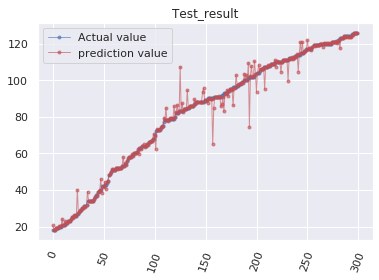

In [0]:
#Test_lightgbm関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)
print(X_test)
# テスト結果を評価する,Test_result()関数
Test_result(Y_pred, y_test)

In [0]:
#以下スタッキング↓　まだやりません！！今後MLPとか入れたい　僕のレベルじゃまだ無理だ

In [0]:
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb # 勾配ブースティング
import seaborn as sns # オシャレなグラフ
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

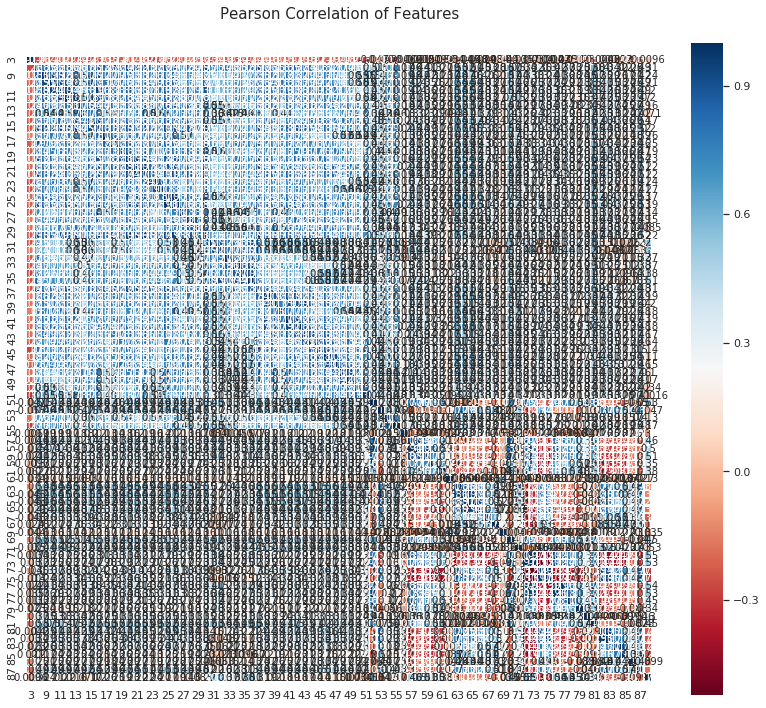

In [0]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(dtt.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
ntrain = X_train.shape[0] # 891
ntest = X_test.shape[0] # 418
SEED = 0
NFOLDS = 5 # 5分割

kf = KFold(5,shuffle=False)

print(kf)


# Sclearn分類機を拡張
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)

    def fit(self,x,y):
        return self.clf.fit(x,y)

    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

KFold(n_splits=5, random_state=None, shuffle=False)


In [0]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train,y_train)): # NFOLDS回まわる
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [0]:
# 各モデルのパラメータ
# Random Forest
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [0]:
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

In [0]:
#ベースモデルへの入力用データをNumPy配列で準備します。
y_train = y_train

x_train = X_train # 学習データ
x_test = X_test # テストデータ

In [0]:
# 5つのベースモデルで予測


et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees Classifier
#rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest Classifier
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost Classifier
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost Classifier
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

print("Training is complete")

Training is complete


In [0]:
#各重要度を表示
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

[0.01114189 0.01320041 0.00736361 0.00906715 0.01144271 0.01051894
 0.01307181 0.00781668 0.01310072 0.01568876 0.01690476 0.01324917
 0.015387   0.01820965 0.01952568 0.01894802 0.01197497 0.01501629
 0.01718753 0.01627417 0.01361962 0.01628736 0.01135348 0.02745729
 0.01816723 0.01747188 0.02274892 0.02169588 0.01793954 0.02474914
 0.03821793 0.01060266 0.00882888 0.01019247 0.00749978 0.01531124
 0.00826431 0.00742107 0.01012711 0.00817337 0.00559926 0.00703474
 0.00989226 0.00957507 0.00867049 0.01414646 0.0137777  0.00716437
 0.01125875 0.00426006 0.0097849  0.01220527 0.01250574 0.0119543
 0.00978996 0.00369941 0.0106912  0.00832219 0.00835154 0.00934955
 0.01218363 0.00986164 0.002214   0.012392   0.0122517  0.01263604
 0.0107075  0.00992102 0.00993744 0.00971666 0.00909179 0.00907064
 0.01058253 0.01240771 0.01127845 0.00588979 0.00690662 0.00954977
 0.01022772 0.01190541 0.01189916 0.01011647]
[0.    0.128 0.    0.    0.    0.02  0.    0.    0.    0.038 0.    0.
 0.    0.    0

In [0]:
#第二モデルの作成 スタッキングだからね
base_predictions_train = pd.DataFrame( {
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel()
    })
print('base_predictions_train.shape : ', base_predictions_train.shape)
base_predictions_train.head(5)

base_predictions_train.shape :  (272, 3)


,ExtraTrees,AdaBoost,GradientBoost
0,117.0,112.0,99.0
1,110.0,112.0,110.0
2,64.0,73.0,100.0
3,110.0,112.0,110.0
4,88.0,83.0,59.0


In [0]:
#第二モデルのヒートマップ　うまく出なかった
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

In [0]:
#ベースモデルの予測値を結合して、第二モデルの学習データとテストデータを作成します
x_train = np.concatenate(( et_oof_train,  ada_oof_train, gb_oof_train, svc_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, ada_oof_test, gb_oof_test, svc_oof_test), axis=1)
print('x_train.shape : ', x_train.shape)
print('x_test.shape : ', x_test.shape)

x_train.shape :  (272, 4)
x_test.shape :  (28, 4)


In [0]:
#とにかく、ベースモデルで作った学習・テストデータを、XGBoostモデルを使って学習・予測します。

gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

In [0]:
print(predictions)

# CSVファイルの作成 
StackingSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions })
StackingSubmission.to_csv("StackingSubmission.csv", index=False)

[120  90  52 111  18 120  88  93  91  90  78 120  90  88 109 111  23 120
  51  91  52  51 107 119 110  52 120  79]


NameError: ignored

予測対象Xs： [123  27  63 102  25 117  84  86  98  96  91 117  73  96 110 112  22 124
  53  95  52  60 115 120 104  42 120 100] , 予測結果→ [120  90  52 111  18 120  88  93  91  90  78 120  90  88 109 111  23 120
  51  91  52  51 107 119 110  52 120  79]
平均絶対誤差 (MAE, Mean Absolute Error
8.178571428571429
二乗平均平方根誤差（RMSE） : 14.244
test_r2_score
0.7912172866437498


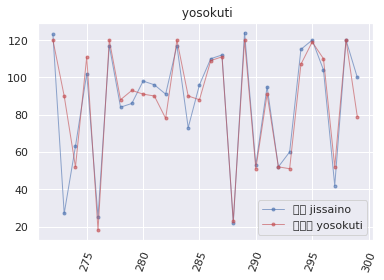

In [0]:

# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする

Y_pred = predictions

# テスト結果を評価する,accuracy_score()
print("予測対象Xs：", y_test, ", 予測結果→", Y_pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(y_test, Y_pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test,Y_pred)))

## test_r2_score計算
test_r2_score = r2_score(y_test,Y_pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()

[1]	valid_0's l2: 7.96227
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 7.56275
[3]	valid_0's l2: 7.19564
[4]	valid_0's l2: 6.87334
[5]	valid_0's l2: 6.60485
[6]	valid_0's l2: 6.3251
[7]	valid_0's l2: 6.09856
[8]	valid_0's l2: 5.90709
[9]	valid_0's l2: 5.76062
[10]	valid_0's l2: 5.60506
[11]	valid_0's l2: 5.43788
[12]	valid_0's l2: 5.34277
[13]	valid_0's l2: 5.22311
[14]	valid_0's l2: 5.13837
[15]	valid_0's l2: 5.06623
[16]	valid_0's l2: 4.96032
[17]	valid_0's l2: 4.89088
[18]	valid_0's l2: 4.81419
[19]	valid_0's l2: 4.75988
[20]	valid_0's l2: 4.67854
[21]	valid_0's l2: 4.63819
[22]	valid_0's l2: 4.57878
[23]	valid_0's l2: 4.51483
[24]	valid_0's l2: 4.43983
[25]	valid_0's l2: 4.41862
[26]	valid_0's l2: 4.39824
[27]	valid_0's l2: 4.34561
[28]	valid_0's l2: 4.32706
[29]	valid_0's l2: 4.27605
[30]	valid_0's l2: 4.23164
[31]	valid_0's l2: 4.21693
[32]	valid_0's l2: 4.19407
[33]	valid_0's l2: 4.16359
[34]	valid_0's l2: 4.14756
[35]	valid_0's l2: 4.14093
[3

,importance
0,37
1,68
2,31
3,63
4,49
5,82
6,55
7,64
8,63
9,30


ここまで特徴量評価------------------------------------------------------------
予測対象Xs： [ 7 10  5  4  7  6  3  5  9  2  2  7  7  1  1  6  4  2  8  2  8  9  5  6
  9  3  5 14  8  1  3  4  7  5  8  5 11 10  5  6  4  8 10  1  6  9  5  5
  8  8  9  0  2  8  5 10  3  7  6  3 14  8  3  6  6  5  8  5  7  9  6  2
  6  7  8  7 11  2  3  3  7  4  3  2  7  9  7  7  8  9  7  4  5  4  5 15
  3  8  7  6  4  9  7  6  5  3  2  8 10  9] , 予測結果→ [4.9778869  4.9778869  4.02867231 4.02867231 4.02867231 4.9778869
 4.02867231 4.02867231 4.02867231 4.9778869  4.02867231 4.9778869
 4.9778869  3.49463275 3.0803756  4.02867231 4.02867231 4.02867231
 4.9778869  4.02867231 4.02867231 4.9778869  4.02867231 4.9778869
 4.9778869  4.02867231 4.02867231 4.02867231 4.9778869  4.02867231
 4.9778869  4.02867231 4.9778869  4.02867231 4.9778869  4.02867231
 4.9778869  4.9778869  4.9778869  4.02867231 4.9778869  4.9778869
 4.9778869  4.02867231 4.9778869  4.02867231 4.02867231 4.02867231
 4.9778869  4.9778869  4.9778869  4.02867231 4

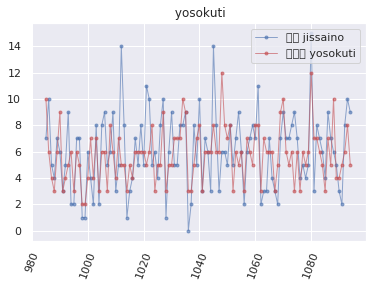

In [0]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm  
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.metrics import r2_score
import lightgbm as lgb

# データを格納する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
lgb_model = lgb.LGBMRegressor(**grid_search.best_params_)

# 学習条件を設定
params = {'task': 'train',
          'metric':{'l2'},
          'boosting_type': 'gbdt',
          'learning_rate': 0.02,
          'num_leaves': 5,
          'min_data_in_leaf': 9,
          'num_iteration': 1000,
          'verbose': 0,
   'max_depth':-1,
   'max_bin':80,
   'n_estimators':8,
   'learning_rate': 0.09,
   'num_iterations': 200,
   'bagging_fraction':1.0
          }

# 学習する
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=500,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=100)

# テストデータで予測する
y_pred = model.predict(x_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred)

# Accuracy を計算する
accuracy = sum(y_test == y_pred_max) / len(y_test)
print('accuracy:', accuracy)

# importanceを表示する
importance = pd.DataFrame(model.feature_importance(), columns=['importance'])
display(importance)


print("ここまで特徴量評価------------------------------------------------------------")


# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
y_pred = model.predict(x_test)

# テスト結果を評価する,accuracy_score()
print("予測対象Xs：", y_test, ", 予測結果→", y_pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(y_test, y_pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test,y_pred)))

## test_r2_score計算
test_r2_score = r2_score(y_test,y_pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()

In [0]:
x_train = np.concatenate(( et_oof_train,  ada_oof_train, gb_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, ada_oof_test, gb_oof_test), axis=1)
print('x_train.shape : ', x_train.shape)
print('x_test.shape : ', x_test.shape)

x_train.shape :  (540, 3)
x_test.shape :  (7, 3)


test_score : -4.592930508354941
best_params : {'bagging_fraction': 1.0, 'learning_rate': 0.06, 'max_bin': 80, 'max_depth': -1, 'min_data_leaf': 9, 'n_estimators': 8, 'num_iterations': 200, 'num_leaves': 5}


,param_max_depth,param_n_estimators
0,-1,8
1,-1,8
2,-1,8
3,-1,8
4,-1,8
...,...,...
10120,-1.1,15
10121,-1.1,15
10122,-1.1,15
10123,-1.1,15


None

予測対象： [4. 4. 3. 3. 5. 5. 5.] , 予測結果→ [5.98758039 5.98758039 5.98758039 6.05194848 5.18568075 5.98758039
 4.8779657 ]
平均絶対誤差 (MAE, Mean Absolute Error
1.615712156709834
二乗平均平方根誤差（RMSE） : 1.970
test_r2_score
-4.592930508354941


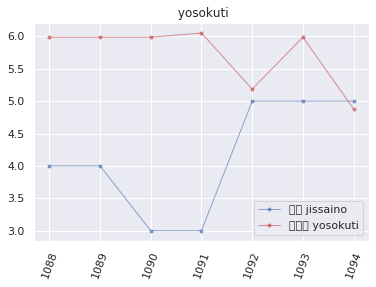

In [0]:
print('test_score : {}'.format(grid_search.score(x_test, ys_test)))
print('best_params : {}'.format(grid_search.best_params_))



# 上記のパラメータでモデルを学習する

# 学習用のデータと結果を学習する,fit(X_train:学習データ, learn_label:答えデータ)
lgb_model.fit(x_train, y_train)



# 各パラメータのCV平均スコア
display(display(pd.DataFrame(grid_search.cv_results_)\
       [['param_max_depth', 'param_n_estimators']]))
# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(x_test)


lgb.LGBMClassifier()
#「LGBMClassifier」のクラスを呼び出して、ハイパーパラメータの初期値を確認



# テスト結果を評価する,accuracy_score()
print("予測対象：", ys_test, ", 予測結果→", Y_pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(ys_test, Y_pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(ys_test,Y_pred)))

## test_r2_score計算
test_r2_score = r2_score(ys_test,Y_pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(ys_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, ys_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()

[1]	valid_0's l2: 3.06544
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.5542
[3]	valid_0's l2: 2.16761
[4]	valid_0's l2: 1.82224
[5]	valid_0's l2: 1.59476
[6]	valid_0's l2: 1.40599
[7]	valid_0's l2: 1.24931
[8]	valid_0's l2: 1.12049
[9]	valid_0's l2: 0.983734
[10]	valid_0's l2: 0.872309
[11]	valid_0's l2: 0.771572
[12]	valid_0's l2: 0.714057
[13]	valid_0's l2: 0.646574
[14]	valid_0's l2: 0.593468
[15]	valid_0's l2: 0.565598
[16]	valid_0's l2: 0.528395
[17]	valid_0's l2: 0.501362
[18]	valid_0's l2: 0.479676
[19]	valid_0's l2: 0.471629
[20]	valid_0's l2: 0.459749
[21]	valid_0's l2: 0.449444
[22]	valid_0's l2: 0.445219
[23]	valid_0's l2: 0.442843
[24]	valid_0's l2: 0.44033
[25]	valid_0's l2: 0.436878
[26]	valid_0's l2: 0.434742
[27]	valid_0's l2: 0.434125
[28]	valid_0's l2: 0.433582
[29]	valid_0's l2: 0.440759
[30]	valid_0's l2: 0.440656
[31]	valid_0's l2: 0.446868
[32]	valid_0's l2: 0.447094
[33]	valid_0's l2: 0.447032
[34]	valid_0's l2: 0.454177
[35]

,importance
0,112
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


ここまで特徴量評価------------------------------------------------------------
予測対象Xs： [4. 4. 3. 3. 5. 5. 5.] , 予測結果→ [3.79712923 3.79712923 3.79712923 3.79712923 3.79712923 3.79712923
 3.79712923]
平均絶対誤差 (MAE, Mean Absolute Error
0.8012303280856591
二乗平均平方根誤差（RMSE） : 0.902
test_r2_score
-0.1722606336870074


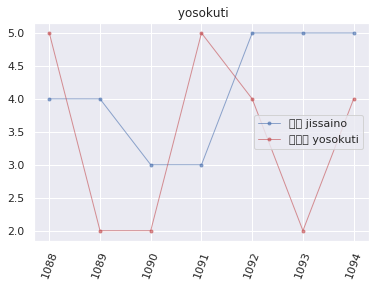

In [0]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm  
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.metrics import r2_score
import lightgbm as lgb

# 学習条件を設定
params = {'task': 'train',
          'metric':{'l2'},
          'boosting_type': 'gbdt',
          'learning_rate': 0.02,
          'num_leaves': 5,
          'min_data_in_leaf': 9,
          'num_iteration': 1000,
          'verbose': 0,
   'max_depth':-1,
   'max_bin':80,
   'n_estimators':8,
   'learning_rate': 0.09,
   'num_iterations': 200,
   'bagging_fraction':1.0
          }

# 学習する
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=500,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=100)

# テストデータで予測する
y_pred = model.predict(x_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred)

# Accuracy を計算する
accuracy = sum(ys_test == y_pred_max) / len(ys_test)
print('accuracy:', accuracy)

# importanceを表示する
importance = pd.DataFrame(model.feature_importance(), columns=['importance'])
display(importance)


print("ここまで特徴量評価------------------------------------------------------------")


# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
y_pred = model.predict(x_test)

# テスト結果を評価する,accuracy_score()
print("予測対象Xs：", ys_test, ", 予測結果→", y_pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(ys_test, y_pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(ys_test,y_pred)))

## test_r2_score計算
test_r2_score = r2_score(ys_test,y_pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(ys_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, ys_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()

In [0]:
print("------------------------------------------------------------")

print("------------------------------------------------------------")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 探索したハイパーパラメータ
def lgb_params2():
   ret = {
   'num_leaves':[10,5,3],
   'max_depth':[-1,-0.5,-0.2],
   'max_bin':[10,50,100,200,255],
   'n_estimators':[10,50,100],
   'min_data_leaf': [10,5,3],
   'learning_rate': [0.1,0.01],
   'num_iterations': [200,300,400],
   'bagging_fraction':[1.0],
   }
   return ret

grid_search = GridSearchCV(lgb.LGBMRegressor(), lgb_params2(), cv=5)

grid_search.fit(x_train, y_train)


print('test_score : {}'.format(grid_search.score(x_test, ys_test)))
print('best_params : {}'.format(grid_search.best_params_))

lgb_model = lgb.LGBMRegressor(**grid_search.best_params_)

# 上記のパラメータでモデルを学習する

# 学習用のデータと結果を学習する,fit(X_train:学習データ, learn_label:答えデータ)
lgb_model.fit(x_train, y_train)

# 各パラメータのCV平均スコア
display(display(pd.DataFrame(grid_search.cv_results_)\
       [['param_max_depth', 'param_n_estimators']]))
# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(x_test)

lgb.LGBMClassifier()
#「LGBMClassifier」のクラスを呼び出して、ハイパーパラメータの初期値を確認

# テスト結果を評価する,accuracy_score()
print("予測対象：", y_test, ", 予測結果→", Y_pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(y_test, Y_pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test,Y_pred)))

## test_r2_score計算
test_r2_score = r2_score(y_test,Y_pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()




------------------------------------------------------------
------------------------------------------------------------
test_score : -5.539766453926673
best_params : {'bagging_fraction': 1.0, 'learning_rate': 0.01, 'max_bin': 50, 'max_depth': -1, 'min_data_leaf': 10, 'n_estimators': 10, 'num_iterations': 200, 'num_leaves': 3}


,param_max_depth,param_n_estimators
0,-1,10
1,-1,10
2,-1,10
3,-1,10
4,-1,10
...,...,...
2425,-0.2,100
2426,-0.2,100
2427,-0.2,100
2428,-0.2,100


None

NameError: ignored

In [0]:

# 探索したハイパーパラメータ
def lgb_params2():
   ret = {
   'num_leaves':[5.5,5,5.4],
   'max_depth':[-1,-0.9,-1.1],
   'max_bin':[80,90,100,110,120],
   'n_estimators':[8,10,15],
   'min_data_leaf': [9,10,11,12,13],
   'learning_rate': [0.1,0.09,0.08,0.07,0.06],
   'num_iterations': [200,300,400],
   'bagging_fraction':[1.0],
   }
   return ret

grid_search = GridSearchCV(lgb.LGBMRegressor(), lgb_params2(), cv=5)

grid_search.fit(X_train, y_train)


print('test_score : {}'.format(grid_search.score(X_test, y_test)))
print('best_params : {}'.format(grid_search.best_params_))


test_score : -0.860540183167118
best_params : {'bagging_fraction': 1.0, 'learning_rate': 0.09, 'max_bin': 80, 'max_depth': -1, 'min_data_leaf': 9, 'n_estimators': 8, 'num_iterations': 200, 'num_leaves': 5}
